## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [1]:
# Preprocessing Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("marketing_data.xlsx")

In [3]:
df.shape

(2240, 22)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth ( Can be converted to age)

## Data Profiling

### Data Types and list of Unique Rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
df['Education'].unique()


array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [8]:
df['Marital_Status'].unique()


array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [9]:
df['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Initial Exploratory Data Analysis

### Outlier Detection

In [11]:
import datetime

current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']


In [12]:
df.loc[df.Income.isnull(), 'Income'] = np.nanmean(df.Income)

'Year of Birth' is changed to 'Age' for ease of use and null Income rows are replaced with the mean of the Income column

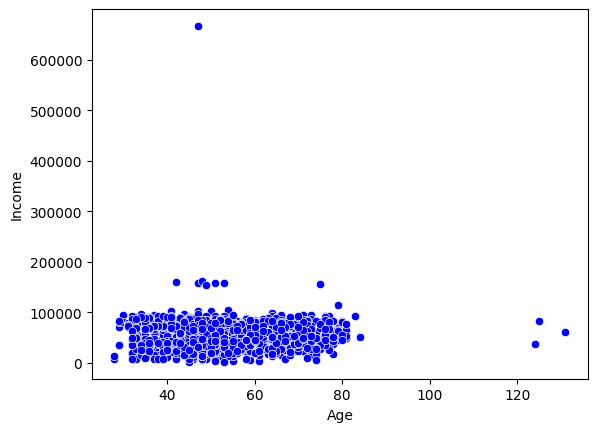

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='Age', y='Income', ax=ax, color='blue')

plt.show()

The graph above shows several outliers in the 'Age' and 'Income' Columns which are needed to be addressed to improve metrics

### Response Percentage

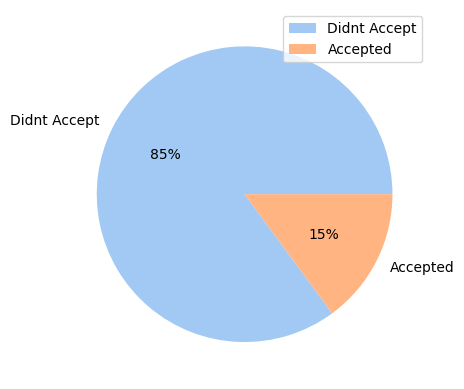

In [14]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

Classification algorithms tend to be biased towards the majority class. This can lead to poor performance in identifying the minority class, even though it might be the class of interest.

As shown above, there is a great imbalance between rows that accepted and did not accept calls. This should be balanced in order to maximize model precision and recall metrics.

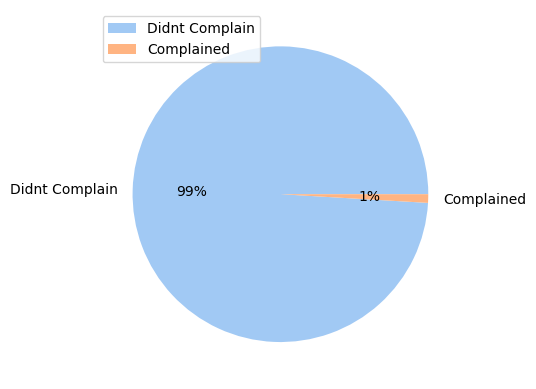

In [15]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

Similar to the response column, there is also a large contrast in people that complained vs didn't complain. 

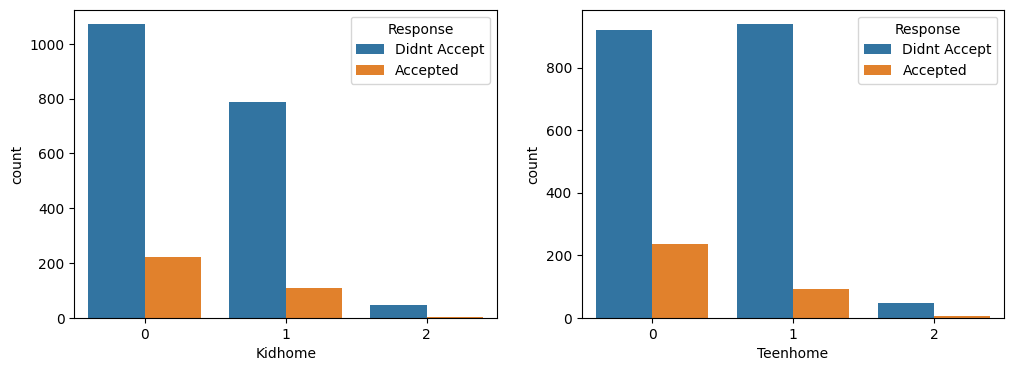

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

### Categorical Feature Analysis

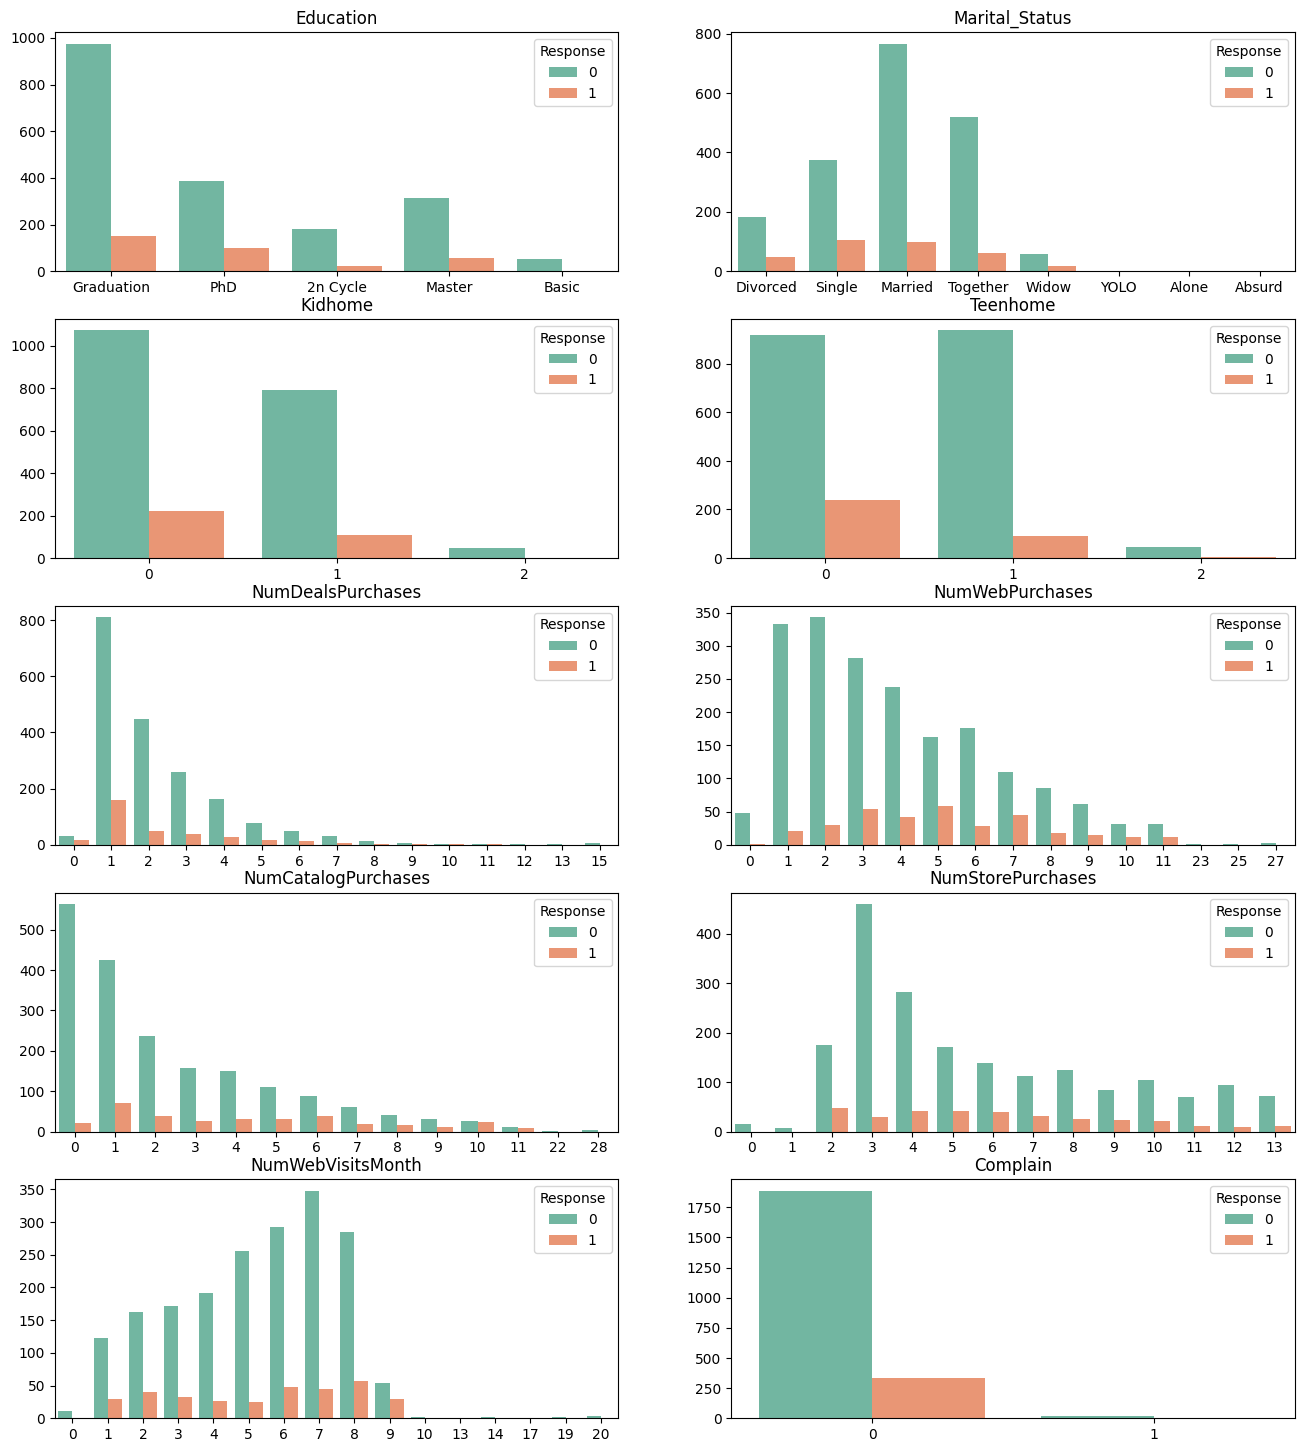

In [17]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

### Continuous feature Analysis

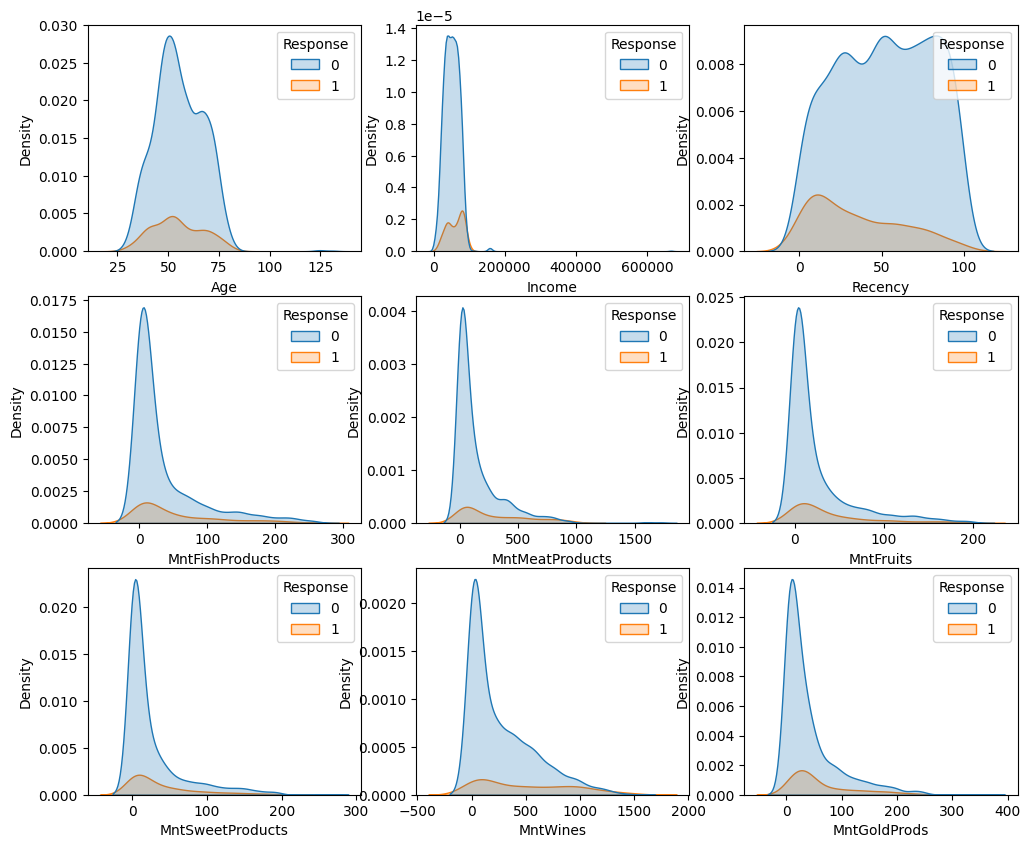

In [18]:
Continuous_cols = ['Age', 'Income', 'Recency', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))

for i, ax, col in zip(range(9), axes.flat, Continuous_cols):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

According to the graphs above, the actual values of MnTMeatProducts and MntWines are significantly higher than other categories which may lead to more distant outliers.

## Data Preprocessing

### Outlier Removal 

In [19]:
df.drop(df.index[df.Age >= 80], inplace=True)
df.drop(df.index[df.Income >= 200000], inplace=True)

df.drop(df.index[df.MntMeatProducts > 1000], inplace=True)
df.drop(df.index[df.MntWines > 1500], inplace=True)
df.drop(df.index[df.MntSweetProducts > 220], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

The above column's outliers were dropped seeing that the number of outliers are more distant than other columns with outliers

## Baseline Modelling

### Feature Selection

In [20]:
X = df.drop('Response', axis=1).iloc[:,1:][
     [
     #'Dt_Customer',
     'Age',
     'Education',
     'Marital_Status',
     'MntFishProducts', 
     'MntMeatProducts', 
     'MntFruits', 
     'MntSweetProducts', 
     'MntWines', 
     'MntGoldProds',
     'Income',
     #'Complain',
     #'Kidhome',
     'Teenhome',  
     'NumDealsPurchases',  
     'NumCatalogPurchases', 
     'NumStorePurchases', 
     'NumWebPurchases',  
     #'NumWebVisitsMonth',  
     'Recency'  
    ]]


y = df['Response']



In [21]:
X

,Age,Education,Marital_Status,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,Income,Teenhome,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,Recency
0,54,Graduation,Divorced,111,379,104,189,189,218,84835.0,0,1,4,6,4,0
1,63,Graduation,Single,7,64,5,0,464,37,57091.0,0,1,3,7,7,0
2,66,Graduation,Married,15,59,11,2,134,30,67267.0,1,1,2,5,3,0
3,57,Graduation,Together,0,1,0,0,10,0,32474.0,1,1,0,2,1,0
4,35,Graduation,Single,11,24,16,0,6,34,21474.0,0,2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,48,PhD,Divorced,47,126,18,48,372,78,66476.0,1,2,2,11,5,99
2236,47,2n Cycle,Married,3,13,10,8,5,16,31056.0,0,1,0,3,1,99
2237,48,Graduation,Divorced,15,88,2,5,185,14,46310.0,0,2,1,5,6,99
2238,46,Graduation,Married,149,701,38,165,267,63,65819.0,0,1,4,10,5,99


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Replace Marital_Status values
marital_status_mapping = {
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Together': 'Married'
}

for status in marital_status_mapping:
    X.loc[X['Marital_Status'] == status, 'Marital_Status'] = marital_status_mapping[status]

# Replace Education values
education_mapping = {
    'Graduation': 'Bachelors',
    '2n Cycle': 'Master',
    'Basic': 'High School'
}

for edu in education_mapping:
    X.loc[X['Education'] == edu, 'Education'] = education_mapping[edu]

# Ordinal encode the Education column
ordinal_encoder = OrdinalEncoder(categories=[['High School', 'Bachelors', 'Master', 'PhD']])
X['Education'] = ordinal_encoder.fit_transform(X[['Education']])

def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

X = one_hot_encode(X, 'Marital_Status')


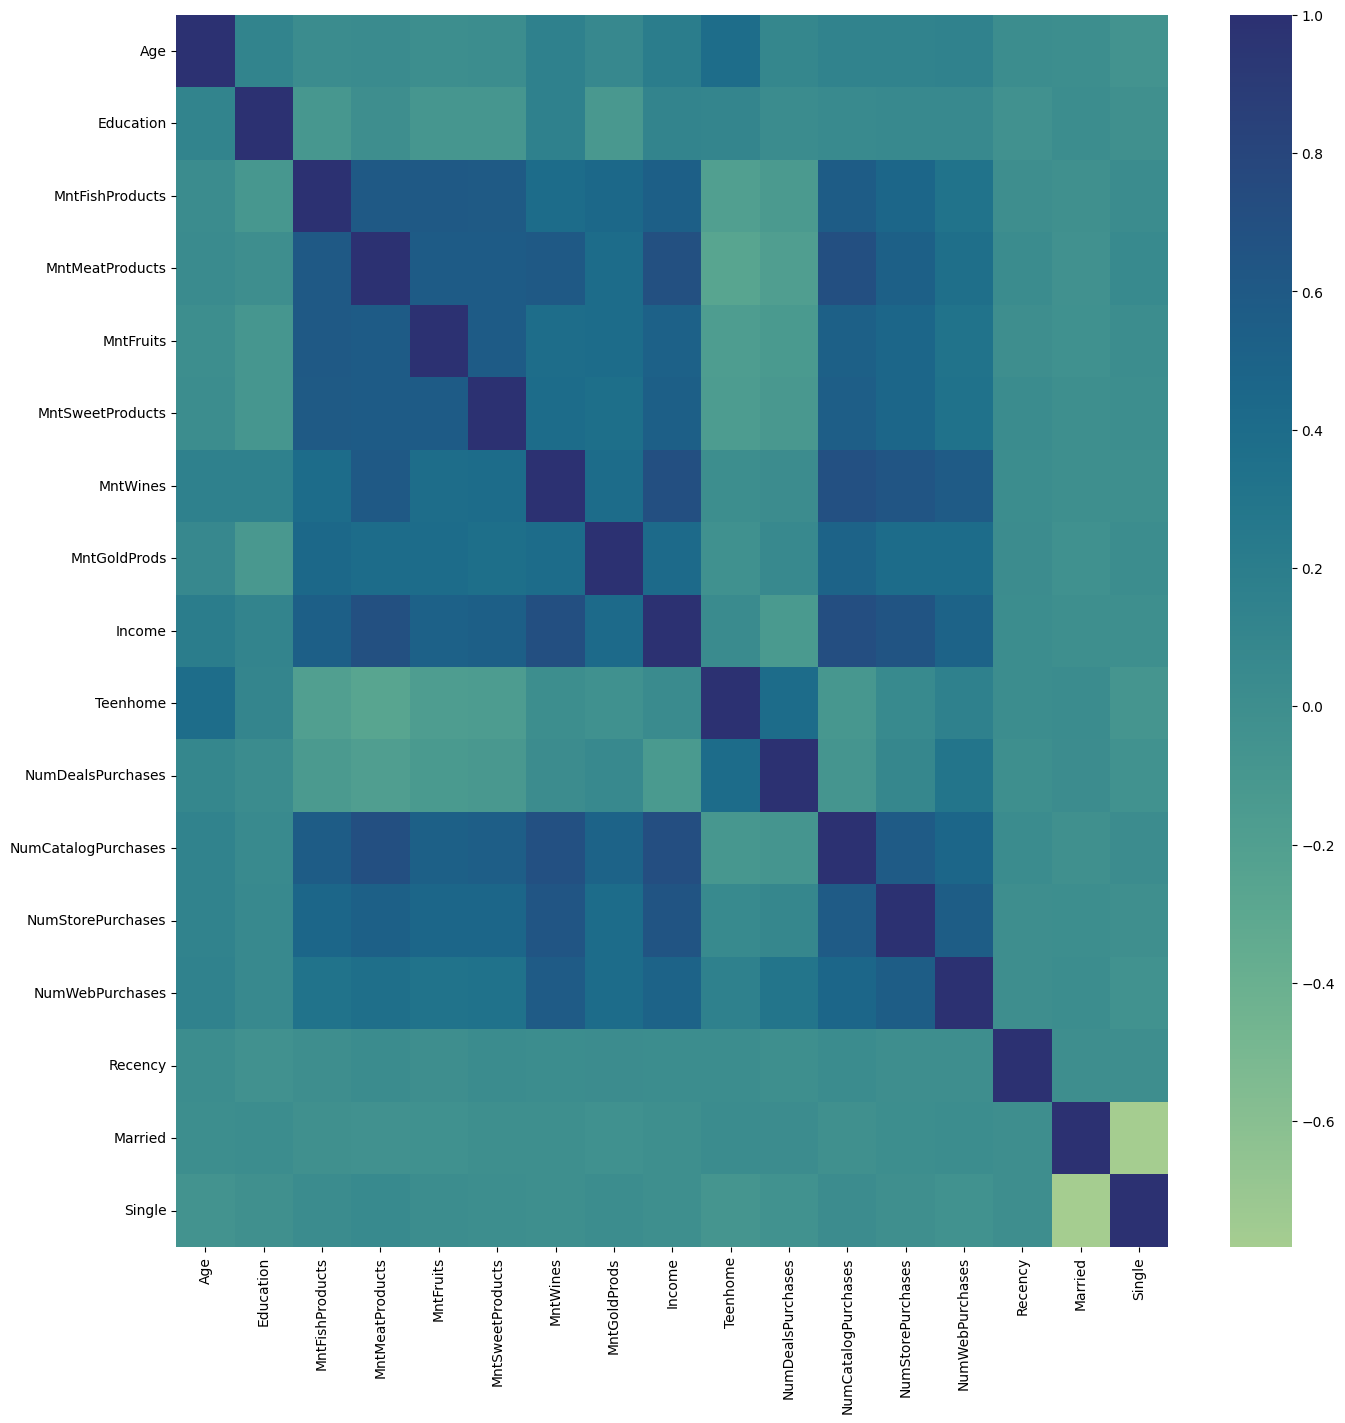

In [23]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(X.corr(), ax=ax, cmap='crest')

plt.show()

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Oversampling 

In [25]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((3762, 17), (3762,))

In [26]:
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X, y)

# X_resampled.shape, y_resampled.shape

### Undersampling

In [27]:
# rus = RandomUnderSampler()
# X_resampled, y_resampled = rus.fit_resample(X, y)

# X_resampled.shape, y_resampled.shape

In [28]:
# nm = NearMiss()
# X_resampled, y_resampled = nm.fit_resample(X, y)

# X_resampled.shape, y_resampled.shape

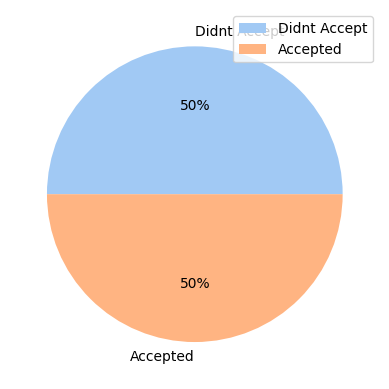

In [29]:
colors = sns.color_palette('pastel')[0:len(y.value_counts())]

#create pie chart
plt.pie(y_resampled.value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    stratify=y_resampled, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2633, 17), (1129, 17), (2633,), (1129,))

### Standardization

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Machine Learning Models

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Logistic Regression 

In [33]:
log_params = {
    'C': [ 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag'],
    'class_weight': ['balanced', None]
    
}

clf = LogisticRegression(max_iter=5000)
log_grid = GridSearchCV(
    clf, 
    log_params, 
    scoring='f1',
    return_train_score=True,
    cv=kf
)
log_grid.fit(X_train, y_train)
print("Best Parameters: \n", log_grid.best_params_)
log_preds = log_grid.predict(X_test)

c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

Best Parameters: 
 {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gelo\AppData\Local\Programs

In [40]:
print("Logistic Regression Accuracy: %.4f" % accuracy_score(y_test, log_preds))
print("Logistic Regression Precision: %.4f" % precision_score(y_test, log_preds))
print("Logistic Regression Recall: %.4f" % recall_score(y_test, log_preds))
print("Logistic Regression F1: %.4f" % f1_score(y_test, log_preds))
print("Logistic Regression AUC: %.4f" % roc_auc_score(y_test, log_preds))

log_results = pd.DataFrame(log_grid.cv_results_)
log_results.sort_values(by='rank_test_score').head()

Logistic Regression Accuracy: 0.7671
Logistic Regression Precision: 0.7741
Logistic Regression Recall: 0.7535
Logistic Regression F1: 0.7637
Logistic Regression AUC: 0.7670


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055649,0.030603,0.007925,0.002487,100,balanced,l1,liblinear,"{'C': 100, 'class_weight': 'balanced', 'penalt...",0.779271,...,0.765734,0.010869,1,0.762041,0.769451,0.762357,0.774594,0.761724,0.766034,0.005157
12,0.017534,0.004968,0.003496,0.000872,1000,balanced,l1,liblinear,"{'C': 1000, 'class_weight': 'balanced', 'penal...",0.779271,...,0.764363,0.012248,2,0.762041,0.769451,0.761995,0.773423,0.761364,0.765655,0.004891
18,0.014917,0.004460,0.003205,0.000680,1000,None,l1,liblinear,"{'C': 1000, 'class_weight': None, 'penalty': '...",0.776923,...,0.761849,0.014506,3,0.758026,0.769819,0.761995,0.764990,0.758849,0.762736,0.004315
6,0.017357,0.003097,0.003207,0.000254,100,None,l1,liblinear,"{'C': 100, 'class_weight': None, 'penalty': 'l...",0.776923,...,0.761548,0.014742,4,0.758026,0.769819,0.762357,0.764621,0.764013,0.763767,0.003804
3,0.021778,0.001781,0.002804,0.000513,100,balanced,l2,liblinear,"{'C': 100, 'class_weight': 'balanced', 'penalt...",0.738523,...,0.746611,0.019276,5,0.738537,0.761397,0.737561,0.758285,0.746384,0.748433,0.009853


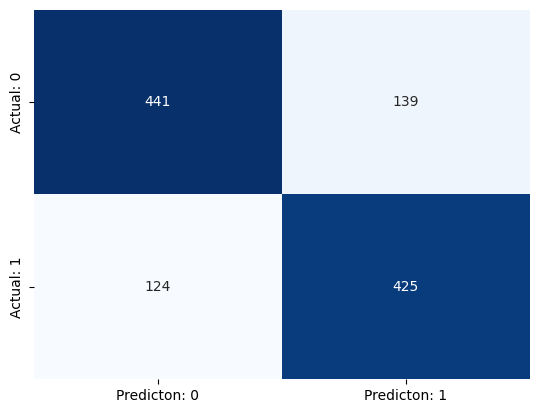

In [41]:
cm_log = confusion_matrix(log_preds, y_test)

fig, ax = plt.subplots()

sns.heatmap(cm_log, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
            xticklabels=['Predicton: 0', 'Predicton: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.show()

### Naive Bayes

In [34]:
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None , [0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
}

gnb = GaussianNB()
nb_grid = GridSearchCV(
    gnb, 
    nb_params, 
    scoring='f1',
    return_train_score=True,
    cv=kf
)
nb_grid.fit(X_train, y_train)
print("Best Parameters: \n", nb_grid.best_params_)
naive_preds = nb_grid.predict(X_test)

Best Parameters: 
 {'priors': [0.4, 0.6], 'var_smoothing': 1e-09}


In [ ]:
naive_acc = accuracy_score(y_test, naive_preds)
naive_prec = precision_score(y_test, naive_preds)
naive_rec = recall_score(y_test, naive_preds)
naive_f1 = f1_score(y_test, naive_preds)
naive_auc = roc_auc_score(y_test, naive_preds)

In [42]:
print("\nNaive Bayes Accuracy: %.4f" % naive_acc)
print("Naive Bayes Precision: %.4f" % naive_prec)
print("Naive Bayes Recall: %.4f" % naive_rec)
print("Naive Bayes F1: %.4f" % naive_f1)
print("Naive Bayes AUC: %.4f" % naive_auc)


nb_results = pd.DataFrame(nb_grid.cv_results_)
nb_results.sort_values(by='rank_test_score').head()


Naive Bayes Accuracy: 0.6794
Naive Bayes Precision: 0.6913
Naive Bayes Recall: 0.6472
Naive Bayes F1: 0.6685
Naive Bayes AUC: 0.6793


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,0.003110,0.000801,0.003001,0.000895,"[0.4, 0.6]",0.0,"{'priors': [0.4, 0.6], 'var_smoothing': 1e-09}",0.637624,0.656716,0.669276,...,0.644672,0.017711,1,0.637838,0.642752,0.642822,0.655240,0.650242,0.645779,0.006171
16,0.003115,0.000591,0.003400,0.000489,"[0.4, 0.6]",0.0,"{'priors': [0.4, 0.6], 'var_smoothing': 1e-08}",0.626984,0.643939,0.650602,...,0.625491,0.020248,2,0.624813,0.620101,0.618218,0.633367,0.631011,0.625502,0.005914
5,0.003704,0.001538,0.003419,0.001024,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.614754,0.643939,0.654321,...,0.624611,0.020673,3,0.621814,0.626078,0.618902,0.636872,0.627314,0.626196,0.006126
0,0.005418,0.000808,0.004348,0.001125,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.614754,0.643939,0.654321,...,0.624586,0.020781,4,0.622132,0.626078,0.618902,0.636872,0.627000,0.626197,0.006072
17,0.003541,0.000490,0.002801,0.000749,"[0.4, 0.6]",0.0,"{'priors': [0.4, 0.6], 'var_smoothing': 1e-07}",0.622490,0.626692,0.639676,...,0.612699,0.021497,5,0.617172,0.614446,0.606980,0.618200,0.618218,0.615003,0.004241


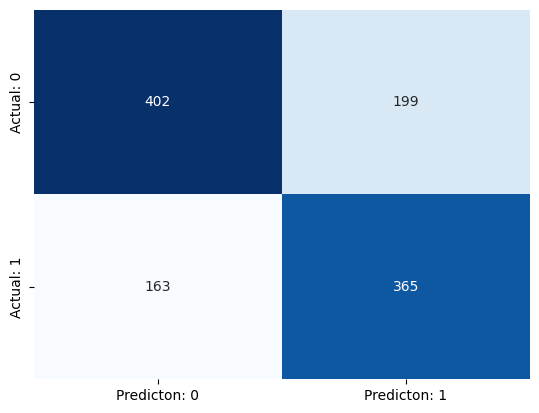

In [43]:
cm_nb = confusion_matrix(naive_preds, y_test)

fig, ax = plt.subplots()

sns.heatmap(cm_nb, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
            xticklabels=['Predicton: 0', 'Predicton: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.show()

### Decision Tree

In [35]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'splitter': ['best', 'random'],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 50, 100]
}

clf = DecisionTreeClassifier()
dt_grid = GridSearchCV(
    clf, 
    dt_params, 
    scoring='f1',
    return_train_score=True,
    cv=kf
)
dt_grid.fit(X_train, y_train)
print("Best Parameters: \n", dt_grid.best_params_)
tree_preds = dt_grid.predict(X_test)

Best Parameters: 
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 100, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'best'}


In [46]:

tree_acc = accuracy_score(y_test, tree_preds)
tree_prec = precision_score(y_test, tree_preds)
tree_rec = recall_score(y_test, tree_preds)
tree_f1 = f1_score(y_test, tree_preds)
tree_auc = roc_auc_score(y_test, tree_preds)

print("\nDecision Tree Accuracy: %.4f" % tree_acc)
print("Decision Tree Precision: %.4f" % tree_prec)
print("Decision Tree Recall: %.4f" % tree_rec)
print("Decision Tree F1: %.4f" % tree_f1)
print("Decision Tree AUC: %.4f" % tree_auc)

dt_results = pd.DataFrame(dt_grid.cv_results_)
dt_results.sort_values(by='rank_test_score')


Decision Tree Accuracy: 0.8556
Decision Tree Precision: 0.8157
Decision Tree Recall: 0.9184
Decision Tree F1: 0.8641
Decision Tree AUC: 0.8557


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
414,0.007129,0.000754,0.004324,0.000870,gini,15,log2,100,5,10,...,0.843612,0.016359,1,0.921604,0.902908,0.903521,0.913511,0.907579,0.909825,0.007000
846,0.006007,0.000317,0.003012,0.000839,entropy,15,log2,100,5,10,...,0.835972,0.027036,2,0.906752,0.893538,0.881202,0.899771,0.905254,0.897303,0.009295
776,0.006312,0.000817,0.002702,0.000399,entropy,15,sqrt,100,5,15,...,0.834879,0.013451,3,0.901854,0.910420,0.887489,0.895452,0.902033,0.899450,0.007640
774,0.005706,0.001124,0.003410,0.000579,entropy,15,sqrt,100,5,10,...,0.833875,0.027415,4,0.904894,0.903803,0.890802,0.899452,0.903454,0.900481,0.005179
416,0.006912,0.001162,0.003814,0.001213,gini,15,log2,100,5,15,...,0.833494,0.027317,5,0.895872,0.907579,0.889921,0.895440,0.906193,0.899001,0.006786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.003409,0.000668,0.003109,0.000204,gini,15,log2,10,15,15,...,0.594818,0.069728,860,0.631524,0.549161,0.591410,0.685339,0.534287,0.598344,0.055208
797,0.003302,0.000604,0.002736,0.000886,entropy,15,log2,10,5,20,...,0.592469,0.081007,861,0.672791,0.426888,0.636314,0.598181,0.712806,0.609396,0.098865
651,0.003201,0.000400,0.002910,0.000370,entropy,10,log2,10,5,15,...,0.586066,0.055175,862,0.660442,0.661743,0.559809,0.561305,0.623321,0.613324,0.045242
143,0.003609,0.000661,0.003235,0.000748,gini,5,log2,100,15,20,...,0.584453,0.024234,863,0.659191,0.590529,0.620097,0.587604,0.654115,0.622307,0.030302


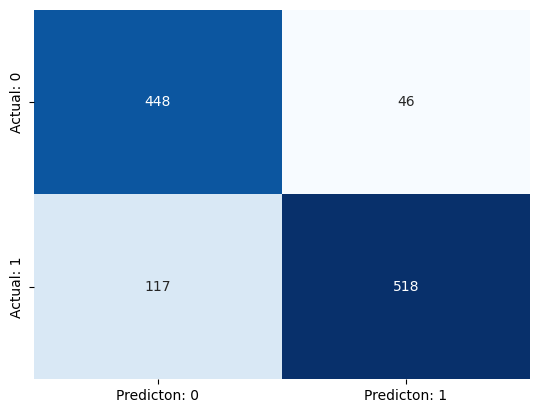

In [47]:
cm_dt = confusion_matrix(tree_preds, y_test)

fig, ax = plt.subplots()

sns.heatmap(cm_dt, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
            xticklabels=['Predicton: 0', 'Predicton: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.show()

### Support Vector Machine

In [36]:
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
    'kernel': ['rbf']
}

svm = SVC(gamma='auto')
svm_grid = GridSearchCV(
    svm, 
    svm_params, 
    scoring='f1',
    return_train_score=True
)
svm_grid.fit(X_train, y_train)
print("Best Parameters: \n", svm_grid.best_params_)
svm_preds = svm_grid.predict(X_test)


Best Parameters: 
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
svm_acc = accuracy_score(y_test, svm_preds)
svm_prec = precision_score(y_test, svm_preds)
svm_rec = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)
svm_auc = roc_auc_score(y_test, svm_preds)


In [44]:
print("\nSVM Accuracy: %.4f" % svm_acc)
print("SVM Precision: %.4f" % svm_prec)
print("SVM Recall: %.4f" % svm_rec)
print("SVM F1: %.4f" % svm_f1)
print("SVM AUC: %.4f" % svm_auc)

svm_results = pd.DataFrame(svm_grid.cv_results_)
svm_results.sort_values(by='rank_test_score').head()


SVM Accuracy: 0.9929
SVM Precision: 0.9894
SVM Recall: 0.9965
SVM F1: 0.9929
SVM AUC: 0.9929


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.249283,0.048268,0.078599,0.001474,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.986616,0.946955,...,0.969674,0.012913,1,0.993859,0.995252,0.993859,0.994794,0.995749,0.994703,0.000752
26,0.240640,0.034659,0.077488,0.001844,1000,0.01,rbf,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",0.986616,0.946955,...,0.969674,0.012913,1,0.993859,0.995252,0.993859,0.994794,0.995749,0.994703,0.000752
25,0.226429,0.006275,0.093721,0.031950,1000,0.1,rbf,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.986616,0.946955,...,0.969674,0.012913,1,0.993859,0.995252,0.993859,0.994794,0.995749,0.994703,0.000752
24,0.224032,0.005611,0.076484,0.001982,1000,1,rbf,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.986616,0.946955,...,0.969674,0.012913,1,0.993859,0.995252,0.993859,0.994794,0.995749,0.994703,0.000752
23,0.247090,0.042667,0.079303,0.004326,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.986616,0.946955,...,0.969674,0.012913,1,0.993859,0.995252,0.993859,0.994794,0.995749,0.994703,0.000752


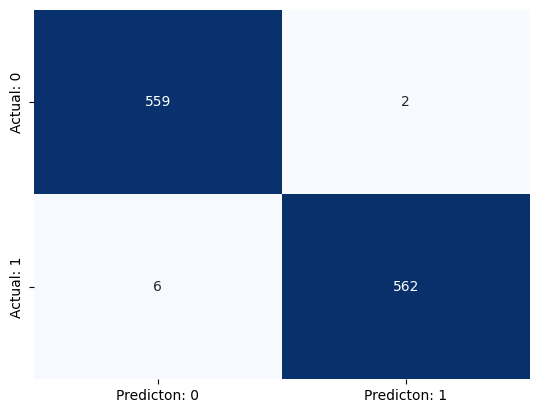

In [45]:
cm_svc = confusion_matrix(svm_preds, y_test)

fig, ax = plt.subplots()

sns.heatmap(cm_svc, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
            xticklabels=['Predicton: 0', 'Predicton: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.show()

### K-Nearest Neighbors

In [52]:
knn_params = {
    'n_neighbors': [9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
    }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(
    knn, 
    knn_params, 
    scoring='f1',
    return_train_score=True,
    cv=kf
)
knn_grid.fit(X_train, y_train)
print("Best Parameters: \n", knn_grid.best_params_)
knn_preds = knn_grid.predict(X_test)

Best Parameters: 
 {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


In [53]:
knn_acc = accuracy_score(y_test, knn_preds)
knn_prec = precision_score(y_test, knn_preds)
knn_rec = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)
knn_auc = roc_auc_score(y_test, knn_preds)

In [54]:
print("\nKNN Accuracy: %.4f" % knn_acc)
print("KNN Precision: %.4f" % knn_prec)
print("KNN Recall: %.4f" % knn_rec)
print("KNN F1: %.4f" % knn_f1)
print("KNN AUC: %.4f" % knn_auc)

knn_results = pd.DataFrame(knn_grid.cv_results_)
knn_results.sort_values(by='rank_test_score').head()


KNN Accuracy: 0.8636
KNN Precision: 0.7871
KNN Recall: 0.9965
KNN F1: 0.8795
KNN AUC: 0.8637


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,0.004403,0.000374,0.006209,0.000247,ball_tree,15,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 15, ...",0.862944,0.883642,...,0.864879,0.017450,1,0.995256,0.994794,0.993853,0.994754,0.996269,0.994985,0.000786
23,0.005404,0.000581,0.005611,0.000195,kd_tree,15,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 15, 'w...",0.862944,0.883642,...,0.864879,0.017450,1,0.995256,0.994794,0.993853,0.994754,0.996269,0.994985,0.000786
7,0.004251,0.001353,0.011300,0.001725,auto,15,distance,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig...",0.862944,0.883642,...,0.864879,0.017450,1,0.995256,0.994794,0.993853,0.994754,0.996269,0.994985,0.000786
31,0.003306,0.000249,0.008411,0.000664,brute,15,distance,"{'algorithm': 'brute', 'n_neighbors': 15, 'wei...",0.862944,0.883642,...,0.864879,0.017450,1,0.995256,0.994794,0.993853,0.994754,0.996269,0.994985,0.000786
17,0.006107,0.000376,0.005106,0.000590,kd_tree,9,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 9, 'we...",0.878893,0.873333,...,0.861048,0.020214,5,0.995256,0.994794,0.993853,0.994754,0.996269,0.994985,0.000786


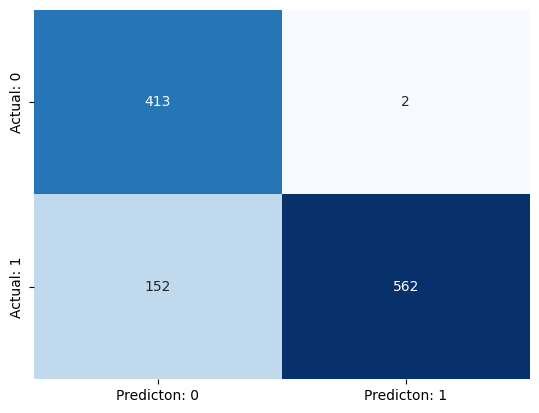

In [55]:
cm_knn = confusion_matrix(knn_preds, y_test)

fig, ax = plt.subplots()

sns.heatmap(cm_knn, ax=ax, cmap='Blues', annot=True, fmt='g', cbar=False,
            xticklabels=['Predicton: 0', 'Predicton: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])

plt.show()

## Ensemble Methods

## Results

In [56]:
# TO REMOVE BEFORE SUBMISSION
print("Logistic Regression Accuracy: %.4f" % acc)
print("Logistic Regression Precision: %.4f" % prec)
print("Logistic Regression Recall: %.4f" % rec)
print("Logistic Regression F1: %.4f" % f1)
print("Logistic Regression AUC: %.4f" % auc)

print("\nNaive Bayes Accuracy: %.4f" % naive_acc)
print("Naive Bayes Precision: %.4f" % naive_prec)
print("Naive Bayes Recall: %.4f" % naive_rec)
print("Naive Bayes F1: %.4f" % naive_f1)
print("Naive Bayes AUC: %.4f" % naive_auc)

print("\nSVM Accuracy: %.4f" % svm_acc)
print("SVM Precision: %.4f" % svm_prec)
print("SVM Recall: %.4f" % svm_rec)
print("SVM F1: %.4f" % svm_f1)
print("SVM AUC: %.4f" % svm_auc)

print("\nDecision Tree Accuracy: %.4f" % tree_acc)
print("Decision Tree Precision: %.4f" % tree_prec)
print("Decision Tree Recall: %.4f" % tree_rec)
print("Decision Tree F1: %.4f" % tree_f1)
print("Decision Tree AUC: %.4f" % tree_auc)

print("\nKNN Accuracy: %.4f" % knn_acc)
print("KNN Precision: %.4f" % knn_prec)
print("KNN Recall: %.4f" % knn_rec)
print("KNN F1: %.4f" % knn_f1)
print("KNN AUC: %.4f" % knn_auc)


Logistic Regression Accuracy: 0.7671
Logistic Regression Precision: 0.7741
Logistic Regression Recall: 0.7535
Logistic Regression F1: 0.7637
Logistic Regression AUC: 0.7670

Naive Bayes Accuracy: 0.6794
Naive Bayes Precision: 0.6913
Naive Bayes Recall: 0.6472
Naive Bayes F1: 0.6685
Naive Bayes AUC: 0.6793

SVM Accuracy: 0.9929
SVM Precision: 0.9894
SVM Recall: 0.9965
SVM F1: 0.9929
SVM AUC: 0.9929

Decision Tree Accuracy: 0.8556
Decision Tree Precision: 0.8157
Decision Tree Recall: 0.9184
Decision Tree F1: 0.8641
Decision Tree AUC: 0.8557

KNN Accuracy: 0.8636
KNN Precision: 0.7871
KNN Recall: 0.9965
KNN F1: 0.8795
KNN AUC: 0.8637
